In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-in-youth-of-india/heart_attack_youngsters_india.csv


# Importing the file

In [2]:
train=pd.read_csv("/kaggle/input/heart-attack-in-youth-of-india/heart_attack_youngsters_india.csv")
train.head()

,Age,Gender,Region,Urban/Rural,SES,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),...,Stress Level,Blood Pressure (systolic/diastolic mmHg),Resting Heart Rate (bpm),ECG Results,Chest Pain Type,Maximum Heart Rate Achieved,Exercise Induced Angina,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),Heart Attack Likelihood
0,30,Male,East,Urban,Middle,Never,Regularly,Non-Vegetarian,Sedentary,3,...,High,177.0/63.1,82,Normal,Non-anginal,183,No,94.1,58,No
1,24,Female,East,Urban,Low,Occasionally,Occasionally,Non-Vegetarian,Sedentary,15,...,High,137.5/110.7,76,Normal,Non-anginal,118,No,97.1,341,No
2,24,Female,North,Urban,Low,Occasionally,Occasionally,Vegan,High,15,...,Low,138.3/76.6,86,Normal,Typical,164,No,92.7,373,Yes
3,27,Male,East,Urban,Middle,Occasionally,Never,Vegetarian,Sedentary,6,...,Medium,177.1/90.0,106,Normal,Non-anginal,188,No,98.4,102,Yes
4,21,Female,West,Rural,Low,Occasionally,Occasionally,Vegetarian,Moderate,4,...,Low,130.7/108.8,73,Normal,Atypical,216,No,94.9,235,No


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       10000 non-null  int64  
 1   Gender                                    10000 non-null  object 
 2   Region                                    10000 non-null  object 
 3   Urban/Rural                               10000 non-null  object 
 4   SES                                       10000 non-null  object 
 5   Smoking Status                            10000 non-null  object 
 6   Alcohol Consumption                       10000 non-null  object 
 7   Diet Type                                 10000 non-null  object 
 8   Physical Activity Level                   10000 non-null  object 
 9   Screen Time (hrs/day)                     10000 non-null  int64  
 10  Sleep Duration (hrs/day)           

#  cleaning Data 

In [4]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train['gender'] = encoder.fit_transform(train['Gender'])

In [5]:
train.head()

,Age,Gender,Region,Urban/Rural,SES,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),...,Blood Pressure (systolic/diastolic mmHg),Resting Heart Rate (bpm),ECG Results,Chest Pain Type,Maximum Heart Rate Achieved,Exercise Induced Angina,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),Heart Attack Likelihood,gender
0,30,Male,East,Urban,Middle,Never,Regularly,Non-Vegetarian,Sedentary,3,...,177.0/63.1,82,Normal,Non-anginal,183,No,94.1,58,No,1
1,24,Female,East,Urban,Low,Occasionally,Occasionally,Non-Vegetarian,Sedentary,15,...,137.5/110.7,76,Normal,Non-anginal,118,No,97.1,341,No,0
2,24,Female,North,Urban,Low,Occasionally,Occasionally,Vegan,High,15,...,138.3/76.6,86,Normal,Typical,164,No,92.7,373,Yes,0
3,27,Male,East,Urban,Middle,Occasionally,Never,Vegetarian,Sedentary,6,...,177.1/90.0,106,Normal,Non-anginal,188,No,98.4,102,Yes,1
4,21,Female,West,Rural,Low,Occasionally,Occasionally,Vegetarian,Moderate,4,...,130.7/108.8,73,Normal,Atypical,216,No,94.9,235,No,0


In [6]:
train["Region"].unique()

array(['East', 'North', 'West', 'North-East', 'Central', 'South'],
      dtype=object)

In [7]:
region=pd.get_dummies(train["Region"])
region=region.astype(int)
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Central     10000 non-null  int64
 1   East        10000 non-null  int64
 2   North       10000 non-null  int64
 3   North-East  10000 non-null  int64
 4   South       10000 non-null  int64
 5   West        10000 non-null  int64
dtypes: int64(6)
memory usage: 468.9 KB


In [8]:
train=pd.concat([train,region],axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       10000 non-null  int64  
 1   Gender                                    10000 non-null  object 
 2   Region                                    10000 non-null  object 
 3   Urban/Rural                               10000 non-null  object 
 4   SES                                       10000 non-null  object 
 5   Smoking Status                            10000 non-null  object 
 6   Alcohol Consumption                       10000 non-null  object 
 7   Diet Type                                 10000 non-null  object 
 8   Physical Activity Level                   10000 non-null  object 
 9   Screen Time (hrs/day)                     10000 non-null  int64  
 10  Sleep Duration (hrs/day)           

In [9]:
train.head()

,Age,Gender,Region,Urban/Rural,SES,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),...,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),Heart Attack Likelihood,gender,Central,East,North,North-East,South,West
0,30,Male,East,Urban,Middle,Never,Regularly,Non-Vegetarian,Sedentary,3,...,94.1,58,No,1,0,1,0,0,0,0
1,24,Female,East,Urban,Low,Occasionally,Occasionally,Non-Vegetarian,Sedentary,15,...,97.1,341,No,0,0,1,0,0,0,0
2,24,Female,North,Urban,Low,Occasionally,Occasionally,Vegan,High,15,...,92.7,373,Yes,0,0,0,1,0,0,0
3,27,Male,East,Urban,Middle,Occasionally,Never,Vegetarian,Sedentary,6,...,98.4,102,Yes,1,0,1,0,0,0,0
4,21,Female,West,Rural,Low,Occasionally,Occasionally,Vegetarian,Moderate,4,...,94.9,235,No,0,0,0,0,0,0,1


In [10]:

rural=pd.get_dummies(train["Urban/Rural"])
rural=rural.astype(int)
rural.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Rural   10000 non-null  int64
 1   Urban   10000 non-null  int64
dtypes: int64(2)
memory usage: 156.4 KB


In [11]:
train=pd.concat([train,rural],axis=1)
train.head()

,Age,Gender,Region,Urban/Rural,SES,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),...,Heart Attack Likelihood,gender,Central,East,North,North-East,South,West,Rural,Urban
0,30,Male,East,Urban,Middle,Never,Regularly,Non-Vegetarian,Sedentary,3,...,No,1,0,1,0,0,0,0,0,1
1,24,Female,East,Urban,Low,Occasionally,Occasionally,Non-Vegetarian,Sedentary,15,...,No,0,0,1,0,0,0,0,0,1
2,24,Female,North,Urban,Low,Occasionally,Occasionally,Vegan,High,15,...,Yes,0,0,0,1,0,0,0,0,1
3,27,Male,East,Urban,Middle,Occasionally,Never,Vegetarian,Sedentary,6,...,Yes,1,0,1,0,0,0,0,0,1
4,21,Female,West,Rural,Low,Occasionally,Occasionally,Vegetarian,Moderate,4,...,No,0,0,0,0,0,0,1,1,0


In [12]:
train["SES"].unique()

array(['Middle', 'Low', 'High'], dtype=object)

In [13]:

from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['Low', 'Middle', 'High']])
train['socioeconomic_encoded'] = encoder.fit_transform(train[['SES']])
encoder = OrdinalEncoder(categories=[['Low', 'Middle', 'High']])
train['socioeconomic_encoded']=train['socioeconomic_encoded'].astype(int)
train['socioeconomic_encoded']

0       1
1       0
2       0
3       1
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    2
Name: socioeconomic_encoded, Length: 10000, dtype: int64

In [14]:
train.head()

,Age,Gender,Region,Urban/Rural,SES,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),...,gender,Central,East,North,North-East,South,West,Rural,Urban,socioeconomic_encoded
0,30,Male,East,Urban,Middle,Never,Regularly,Non-Vegetarian,Sedentary,3,...,1,0,1,0,0,0,0,0,1,1
1,24,Female,East,Urban,Low,Occasionally,Occasionally,Non-Vegetarian,Sedentary,15,...,0,0,1,0,0,0,0,0,1,0
2,24,Female,North,Urban,Low,Occasionally,Occasionally,Vegan,High,15,...,0,0,0,1,0,0,0,0,1,0
3,27,Male,East,Urban,Middle,Occasionally,Never,Vegetarian,Sedentary,6,...,1,0,1,0,0,0,0,0,1,1
4,21,Female,West,Rural,Low,Occasionally,Occasionally,Vegetarian,Moderate,4,...,0,0,0,0,0,0,1,1,0,0


In [15]:

train["Alcohol Consumption"].unique()

array(['Regularly', 'Occasionally', 'Never'], dtype=object)

In [16]:
label_map = {'Regularly': 2, 'Occasionally': 1, 'Never': 0}
train['smoking_status_encoded'] = train['Smoking Status'].map(label_map)

print(train)

      Age  Gender      Region Urban/Rural     SES Smoking Status  \
0      30    Male        East       Urban  Middle          Never   
1      24  Female        East       Urban     Low   Occasionally   
2      24  Female       North       Urban     Low   Occasionally   
3      27    Male        East       Urban  Middle   Occasionally   
4      21  Female        West       Rural     Low   Occasionally   
...   ...     ...         ...         ...     ...            ...   
9995   33  Female        East       Rural     Low   Occasionally   
9996   35  Female  North-East       Rural     Low   Occasionally   
9997   32    Male        West       Urban  Middle      Regularly   
9998   21  Female     Central       Rural  Middle      Regularly   
9999   28    Male       North       Rural    High          Never   

     Alcohol Consumption       Diet Type Physical Activity Level  \
0              Regularly  Non-Vegetarian               Sedentary   
1           Occasionally  Non-Vegetarian       

In [17]:
label_map = {'Regularly': 2, 'Occasionally': 1, 'Never': 0}
train['Alcohol Consumption_encoded'] = train['Alcohol Consumption'].map(label_map)

print(train)

      Age  Gender      Region Urban/Rural     SES Smoking Status  \
0      30    Male        East       Urban  Middle          Never   
1      24  Female        East       Urban     Low   Occasionally   
2      24  Female       North       Urban     Low   Occasionally   
3      27    Male        East       Urban  Middle   Occasionally   
4      21  Female        West       Rural     Low   Occasionally   
...   ...     ...         ...         ...     ...            ...   
9995   33  Female        East       Rural     Low   Occasionally   
9996   35  Female  North-East       Rural     Low   Occasionally   
9997   32    Male        West       Urban  Middle      Regularly   
9998   21  Female     Central       Rural  Middle      Regularly   
9999   28    Male       North       Rural    High          Never   

     Alcohol Consumption       Diet Type Physical Activity Level  \
0              Regularly  Non-Vegetarian               Sedentary   
1           Occasionally  Non-Vegetarian       

In [18]:

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       10000 non-null  int64  
 1   Gender                                    10000 non-null  object 
 2   Region                                    10000 non-null  object 
 3   Urban/Rural                               10000 non-null  object 
 4   SES                                       10000 non-null  object 
 5   Smoking Status                            10000 non-null  object 
 6   Alcohol Consumption                       10000 non-null  object 
 7   Diet Type                                 10000 non-null  object 
 8   Physical Activity Level                   10000 non-null  object 
 9   Screen Time (hrs/day)                     10000 non-null  int64  
 10  Sleep Duration (hrs/day)           

In [19]:
train["Diet Type"].unique()
diettype= pd.get_dummies(train["Diet Type"])
diettype=diettype.astype(int)
diettype.head()


,Non-Vegetarian,Vegan,Vegetarian
0,1,0,0
1,1,0,0
2,0,1,0
3,0,0,1
4,0,0,1


In [20]:
train=pd.concat([train,diettype],axis=1)
train


,Age,Gender,Region,Urban/Rural,SES,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),...,South,West,Rural,Urban,socioeconomic_encoded,smoking_status_encoded,Alcohol Consumption_encoded,Non-Vegetarian,Vegan,Vegetarian
0,30,Male,East,Urban,Middle,Never,Regularly,Non-Vegetarian,Sedentary,3,...,0,0,0,1,1,0,2,1,0,0
1,24,Female,East,Urban,Low,Occasionally,Occasionally,Non-Vegetarian,Sedentary,15,...,0,0,0,1,0,1,1,1,0,0
2,24,Female,North,Urban,Low,Occasionally,Occasionally,Vegan,High,15,...,0,0,0,1,0,1,1,0,1,0
3,27,Male,East,Urban,Middle,Occasionally,Never,Vegetarian,Sedentary,6,...,0,0,0,1,1,1,0,0,0,1
4,21,Female,West,Rural,Low,Occasionally,Occasionally,Vegetarian,Moderate,4,...,0,1,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,33,Female,East,Rural,Low,Occasionally,Occasionally,Vegan,Sedentary,2,...,0,0,1,0,0,1,1,0,1,0
9996,35,Female,North-East,Rural,Low,Occasionally,Never,Vegan,High,14,...,0,0,1,0,0,1,0,0,1,0
9997,32,Male,West,Urban,Middle,Regularly,Never,Non-Vegetarian,Moderate,1,...,0,1,0,1,1,2,0,1,0,0
9998,21,Female,Central,Rural,Middle,Regularly,Never,Vegan,Sedentary,9,...,0,0,1,0,1,2,0,0,1,0


In [21]:
train["Physical Activity Level"].unique()

array(['Sedentary', 'High', 'Moderate'], dtype=object)

In [22]:
label_map = {'Sedentary': 2, 'Moderate': 1, 'High': 0}
train['physical_status_encoded'] = train['Physical Activity Level'].map(label_map)

print(train)

      Age  Gender      Region Urban/Rural     SES Smoking Status  \
0      30    Male        East       Urban  Middle          Never   
1      24  Female        East       Urban     Low   Occasionally   
2      24  Female       North       Urban     Low   Occasionally   
3      27    Male        East       Urban  Middle   Occasionally   
4      21  Female        West       Rural     Low   Occasionally   
...   ...     ...         ...         ...     ...            ...   
9995   33  Female        East       Rural     Low   Occasionally   
9996   35  Female  North-East       Rural     Low   Occasionally   
9997   32    Male        West       Urban  Middle      Regularly   
9998   21  Female     Central       Rural  Middle      Regularly   
9999   28    Male       North       Rural    High          Never   

     Alcohol Consumption       Diet Type Physical Activity Level  \
0              Regularly  Non-Vegetarian               Sedentary   
1           Occasionally  Non-Vegetarian       

In [23]:
# Family History of Heart Disease()          10000 non-null  object 
#  12  Diabetes                                  10000 non-null  object 
#  13  Hypertension                              10000 non-null  object 
train["Hypertension"]=train["Hypertension"].map({'Yes':1,"No":0})
train["Family History of Heart Disease"]=train["Family History of Heart Disease"].map({'Yes':1,"No":0})
train["Diabetes"]=train["Diabetes"].map({'Yes':1,"No":0})

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       10000 non-null  int64  
 1   Gender                                    10000 non-null  object 
 2   Region                                    10000 non-null  object 
 3   Urban/Rural                               10000 non-null  object 
 4   SES                                       10000 non-null  object 
 5   Smoking Status                            10000 non-null  object 
 6   Alcohol Consumption                       10000 non-null  object 
 7   Diet Type                                 10000 non-null  object 
 8   Physical Activity Level                   10000 non-null  object 
 9   Screen Time (hrs/day)                     10000 non-null  int64  
 10  Sleep Duration (hrs/day)           

In [25]:
# Stress Level                              10000 non-null  object 
#  17  Blood Pressure (systolic/diastolic mmHg)  10000 non-null  object 
train["Blood Pressure (systolic/diastolic mmHg)"].unique()
train[["BP_systolic_mmHg","BP_diastolic_mmHg"]]=train["Blood Pressure (systolic/diastolic mmHg)"].str.split("/", expand=True)
train['BP_systolic_mmHg'] = train['BP_systolic_mmHg'].astype(float)
train['BP_diastolic_mmHg'] = train['BP_diastolic_mmHg'].astype(float)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 44 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       10000 non-null  int64  
 1   Gender                                    10000 non-null  object 
 2   Region                                    10000 non-null  object 
 3   Urban/Rural                               10000 non-null  object 
 4   SES                                       10000 non-null  object 
 5   Smoking Status                            10000 non-null  object 
 6   Alcohol Consumption                       10000 non-null  object 
 7   Diet Type                                 10000 non-null  object 
 8   Physical Activity Level                   10000 non-null  object 
 9   Screen Time (hrs/day)                     10000 non-null  int64  
 10  Sleep Duration (hrs/day)           

In [26]:
# "ECG Results                               10000 non-null  object 
#   Chest Pain Type                           10000 non-null  object 
#  Exercise Induced Angina                   10000 non-null  object "
train["Exercise Induced Angina"].unique()

array(['No', 'Yes'], dtype=object)

In [27]:

train["ECG Results"]=train["ECG Results"].map({'Normal':1,"Abnormal":0})

In [28]:
Chest=pd.get_dummies(train["Chest Pain Type"])

Chest=Chest.astype(int)
Chest.head()


,Asymptomatic,Atypical,Non-anginal,Typical
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,0,0,1,0
4,0,1,0,0


In [29]:
train=pd.concat([train,Chest],axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 48 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       10000 non-null  int64  
 1   Gender                                    10000 non-null  object 
 2   Region                                    10000 non-null  object 
 3   Urban/Rural                               10000 non-null  object 
 4   SES                                       10000 non-null  object 
 5   Smoking Status                            10000 non-null  object 
 6   Alcohol Consumption                       10000 non-null  object 
 7   Diet Type                                 10000 non-null  object 
 8   Physical Activity Level                   10000 non-null  object 
 9   Screen Time (hrs/day)                     10000 non-null  int64  
 10  Sleep Duration (hrs/day)           

In [30]:
train.drop(columns=["Region", "Gender", "Urban/Rural", "SES", 
                    "Smoking Status", "Alcohol Consumption", 
                    "Diet Type", "Physical Activity Level"], inplace=True)

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 40 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       10000 non-null  int64  
 1   Screen Time (hrs/day)                     10000 non-null  int64  
 2   Sleep Duration (hrs/day)                  10000 non-null  int64  
 3   Family History of Heart Disease           10000 non-null  int64  
 4   Diabetes                                  10000 non-null  int64  
 5   Hypertension                              10000 non-null  int64  
 6   Cholesterol Levels (mg/dL)                10000 non-null  int64  
 7   BMI (kg/m²)                               10000 non-null  float64
 8   Stress Level                              10000 non-null  object 
 9   Blood Pressure (systolic/diastolic mmHg)  10000 non-null  object 
 10  Resting Heart Rate (bpm)           

In [32]:
train["Stress Level"].unique()

array(['High', 'Low', 'Medium'], dtype=object)

In [33]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train['Stress Level'] = encoder.fit_transform(train['Stress Level'])

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 40 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       10000 non-null  int64  
 1   Screen Time (hrs/day)                     10000 non-null  int64  
 2   Sleep Duration (hrs/day)                  10000 non-null  int64  
 3   Family History of Heart Disease           10000 non-null  int64  
 4   Diabetes                                  10000 non-null  int64  
 5   Hypertension                              10000 non-null  int64  
 6   Cholesterol Levels (mg/dL)                10000 non-null  int64  
 7   BMI (kg/m²)                               10000 non-null  float64
 8   Stress Level                              10000 non-null  int64  
 9   Blood Pressure (systolic/diastolic mmHg)  10000 non-null  object 
 10  Resting Heart Rate (bpm)           

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 40 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       10000 non-null  int64  
 1   Screen Time (hrs/day)                     10000 non-null  int64  
 2   Sleep Duration (hrs/day)                  10000 non-null  int64  
 3   Family History of Heart Disease           10000 non-null  int64  
 4   Diabetes                                  10000 non-null  int64  
 5   Hypertension                              10000 non-null  int64  
 6   Cholesterol Levels (mg/dL)                10000 non-null  int64  
 7   BMI (kg/m²)                               10000 non-null  float64
 8   Stress Level                              10000 non-null  int64  
 9   Blood Pressure (systolic/diastolic mmHg)  10000 non-null  object 
 10  Resting Heart Rate (bpm)           

In [36]:
train["Heart Attack Likelihood"]=train["Heart Attack Likelihood"].map({'Yes':1,"No":0})

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 40 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       10000 non-null  int64  
 1   Screen Time (hrs/day)                     10000 non-null  int64  
 2   Sleep Duration (hrs/day)                  10000 non-null  int64  
 3   Family History of Heart Disease           10000 non-null  int64  
 4   Diabetes                                  10000 non-null  int64  
 5   Hypertension                              10000 non-null  int64  
 6   Cholesterol Levels (mg/dL)                10000 non-null  int64  
 7   BMI (kg/m²)                               10000 non-null  float64
 8   Stress Level                              10000 non-null  int64  
 9   Blood Pressure (systolic/diastolic mmHg)  10000 non-null  object 
 10  Resting Heart Rate (bpm)           

In [38]:
train.drop(columns=["Chest Pain Type", "Exercise Induced Angina"], inplace=True)

In [39]:
train.drop(columns=["Blood Pressure (systolic/diastolic mmHg)"],inplace=True)

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              10000 non-null  int64  
 1   Screen Time (hrs/day)            10000 non-null  int64  
 2   Sleep Duration (hrs/day)         10000 non-null  int64  
 3   Family History of Heart Disease  10000 non-null  int64  
 4   Diabetes                         10000 non-null  int64  
 5   Hypertension                     10000 non-null  int64  
 6   Cholesterol Levels (mg/dL)       10000 non-null  int64  
 7   BMI (kg/m²)                      10000 non-null  float64
 8   Stress Level                     10000 non-null  int64  
 9   Resting Heart Rate (bpm)         10000 non-null  int64  
 10  ECG Results                      10000 non-null  int64  
 11  Maximum Heart Rate Achieved      10000 non-null  int64  
 12  Blood Oxygen Levels

# Visulise DATASETS

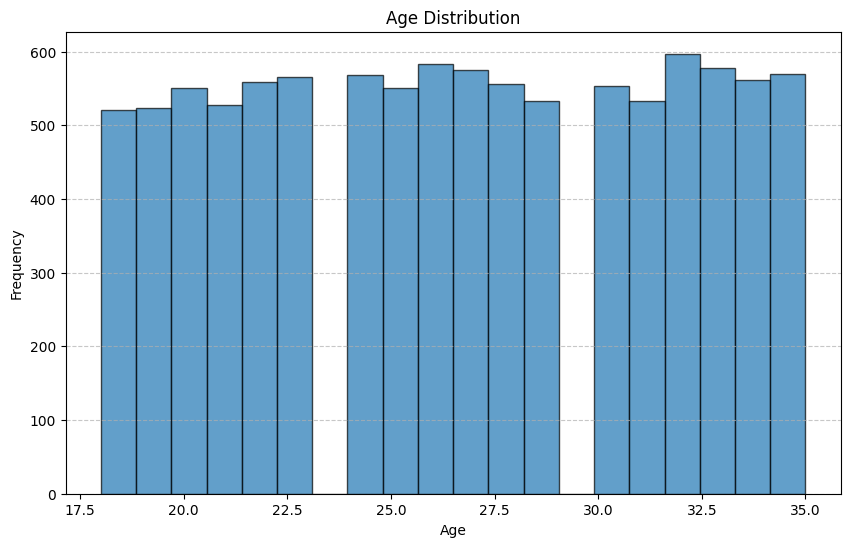

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.hist(train['Age'], bins=20, alpha=0.7, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The majority of individuals are in the 20-30 age group, indicating that heart attack likelihood is being studied in a relatively young population.

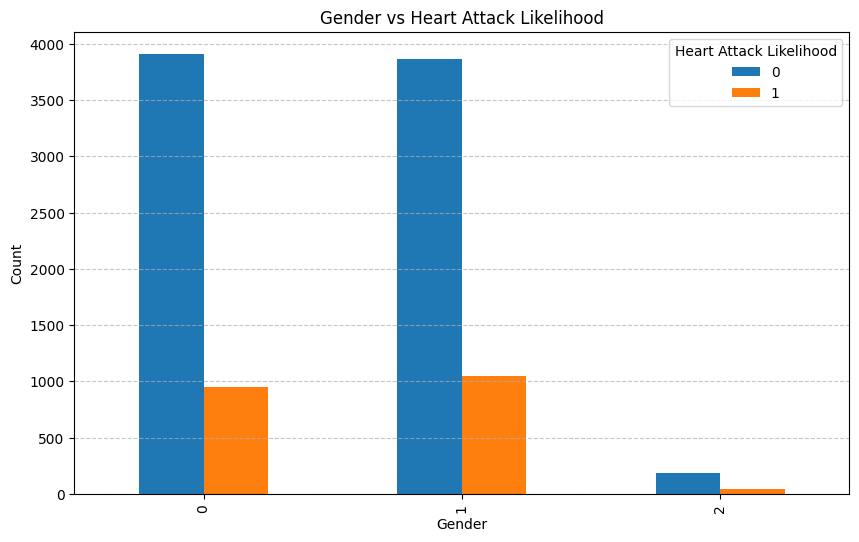

In [42]:
gender_heart_attack = train.groupby(['gender', 'Heart Attack Likelihood']).size().unstack()
gender_heart_attack.plot(kind='bar', figsize=(10, 6))
plt.title('Gender vs Heart Attack Likelihood')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Males show a slightly higher count of heart attack occurrences compared to females in the dataset.**

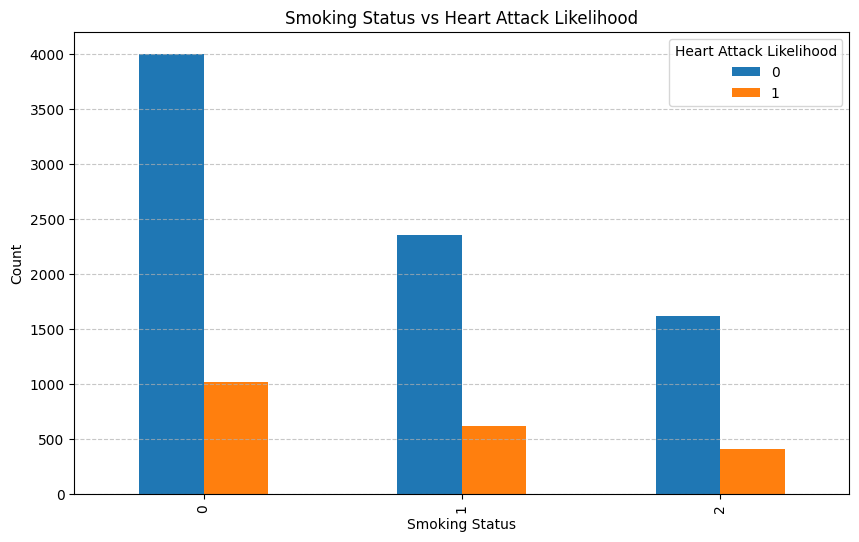

In [43]:
smoking_heart_attack = train.groupby(['smoking_status_encoded', 'Heart Attack Likelihood']).size().unstack()
smoking_heart_attack.plot(kind='bar', figsize=(10, 6))
plt.title('Smoking Status vs Heart Attack Likelihood')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Smokers and occasional smokers have a noticeably higher likelihood of heart attacks compared to non-smokers.******

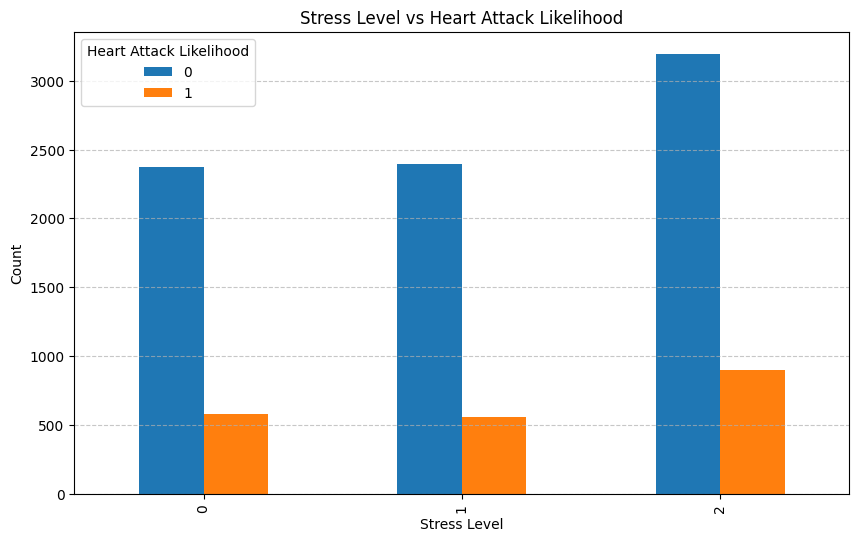

In [44]:
stress_heart_attack = train.groupby(['Stress Level', 'Heart Attack Likelihood']).size().unstack()
stress_heart_attack.plot(kind='bar', figsize=(10, 6))
plt.title('Stress Level vs Heart Attack Likelihood')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Individuals with high stress levels are significantly more likely to experience heart attacks, emphasizing stress as a critical risk factor.**

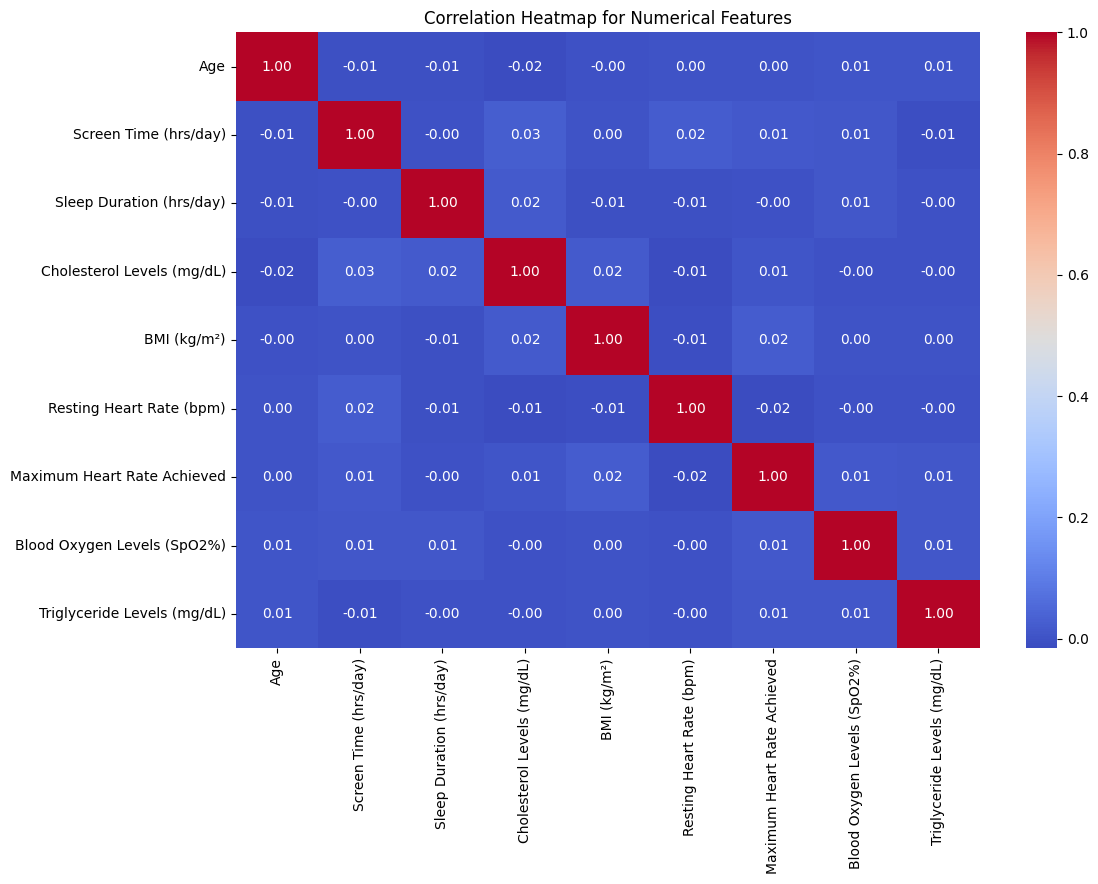

In [45]:
numerical_columns = ['Age', 'Screen Time (hrs/day)', 'Sleep Duration (hrs/day)', 
                     'Cholesterol Levels (mg/dL)', 'BMI (kg/m²)', 'Resting Heart Rate (bpm)', 
                     'Maximum Heart Rate Achieved', 'Blood Oxygen Levels (SpO2%)', 'Triglyceride Levels (mg/dL)']
correlation_matrix = train[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap for Numerical Features')
plt.show()


**BMI, Cholesterol Levels, and Triglyceride Levels show strong correlations with other health metrics.
Maximum Heart Rate Achieved and Resting Heart Rate also have notable relationships with the target variable.**

In [46]:
summary = train.describe()
summary

,Age,Screen Time (hrs/day),Sleep Duration (hrs/day),Family History of Heart Disease,Diabetes,Hypertension,Cholesterol Levels (mg/dL),BMI (kg/m²),Stress Level,Resting Heart Rate (bpm),...,Non-Vegetarian,Vegan,Vegetarian,physical_status_encoded,BP_systolic_mmHg,BP_diastolic_mmHg,Asymptomatic,Atypical,Non-anginal,Typical
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000
mean,26.601500,7.510700,6.489600,0.292900,0.19980,0.245200,199.649000,27.44190,1.114000,89.493400,...,0.494300,0.100000,0.405700,1.393100,139.653120,89.732480,0.248700,0.2460,0.250800,0.254500
std,5.164239,4.626578,2.289327,0.455116,0.39987,0.430227,57.561902,7.22374,0.831549,17.318237,...,0.499993,0.300015,0.491052,0.665745,23.189623,17.216746,0.432281,0.4307,0.433495,0.435602
min,18.000000,0.000000,3.000000,0.000000,0.00000,0.000000,100.000000,15.00000,0.000000,60.000000,...,0.000000,0.000000,0.000000,0.000000,100.000000,60.000000,0.000000,0.0000,0.000000,0.000000
25%,22.000000,4.000000,4.000000,0.000000,0.00000,0.000000,150.000000,21.20000,0.000000,74.000000,...,0.000000,0.000000,0.000000,1.000000,119.400000,75.000000,0.000000,0.0000,0.000000,0.000000
50%,27.000000,8.000000,6.000000,0.000000,0.00000,0.000000,199.000000,27.50000,1.000000,90.000000,...,0.000000,0.000000,0.000000,1.000000,139.200000,89.450000,0.000000,0.0000,0.000000,0.000000
75%,31.000000,12.000000,8.000000,1.000000,0.00000,0.000000,249.000000,33.70000,2.000000,104.000000,...,1.000000,0.000000,1.000000,2.000000,160.000000,104.500000,0.000000,0.0000,1.000000,1.000000
max,35.000000,15.000000,10.000000,1.000000,1.00000,1.000000,300.000000,40.00000,2.000000,119.000000,...,1.000000,1.000000,1.000000,2.000000,180.000000,120.000000,1.000000,1.0000,1.000000,1.000000


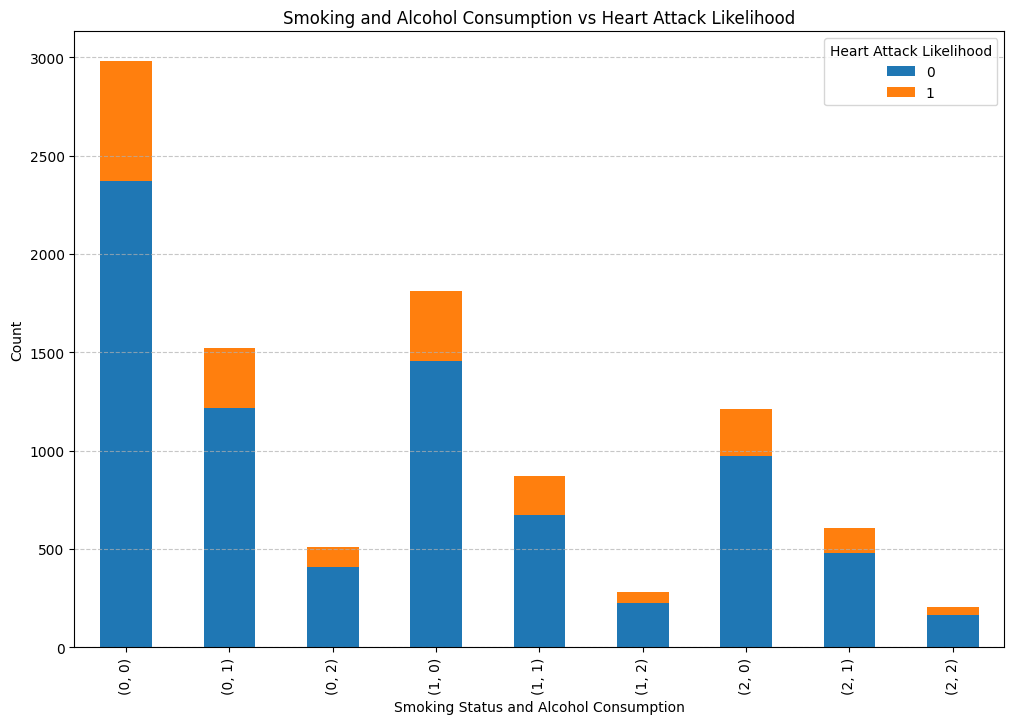

In [47]:
# Visualization 1: Smoking Status and Alcohol Consumption vs Heart Attack Likelihood
smoking_alcohol = train.groupby(['smoking_status_encoded', 'Alcohol Consumption_encoded', 'Heart Attack Likelihood']).size().unstack()
smoking_alcohol.plot(kind='bar', figsize=(12, 8), stacked=True)
plt.title('Smoking and Alcohol Consumption vs Heart Attack Likelihood')
plt.xlabel('Smoking Status and Alcohol Consumption')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Heart Attack Likelihood')
plt.show()

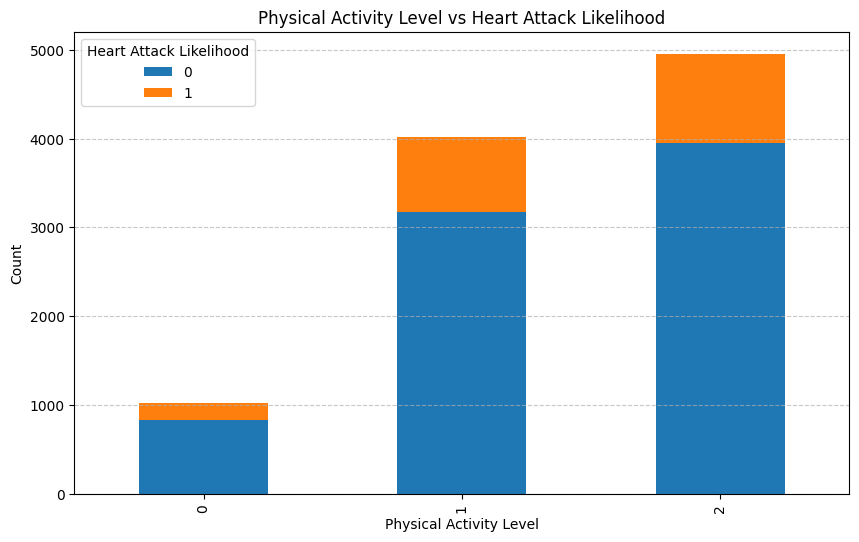

In [48]:
# Visualization 2: Physical Activity Level vs Heart Attack Likelihood
activity_heart_attack = train.groupby(['physical_status_encoded', 'Heart Attack Likelihood']).size().unstack()
activity_heart_attack.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('Physical Activity Level vs Heart Attack Likelihood')
plt.xlabel('Physical Activity Level')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Heart Attack Likelihood')
plt.show()

# Split Features and Target variable

In [49]:
X = train.drop('Heart Attack Likelihood', axis=1)  # Features
y = train['Heart Attack Likelihood']  # Target variable

# Train-test-split

In [54]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Data preprocessing

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [57]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model building

In [58]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Evaluate on validation data
val_predictions = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, val_predictions))

Validation Accuracy: 0.8026666666666666


#  Hyperparameter tuning with GridSearchCV

In [59]:
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}


#  Test the Model

In [60]:
test_predictions = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, test_predictions))
print("Classification Report:\n", classification_report(y_test, test_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_predictions))

Test Accuracy: 0.812
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90      1218
           1       0.00      0.00      0.00       282

    accuracy                           0.81      1500
   macro avg       0.41      0.50      0.45      1500
weighted avg       0.66      0.81      0.73      1500

Confusion Matrix:
 [[1218    0]
 [ 282    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
